## WomenTech Insights

In [35]:
# Import Dependencies
import pandas as pd
import numpy as np
import os

from selenium import webdriver
from selenium.webdriver.chrome.options import Options  
from selenium.webdriver.common.keys import Keys
import time

from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# URL of Event and connection
url = "https://app.hopin.to/events/womentech-global-conference-2020/reception"

chrome_options = Options()  
driver = webdriver.Chrome(executable_path=os.path.abspath("chromedriver"), options=chrome_options) 
driver.get(url)
time.sleep(5)

# Create BeautifulSoup object
html = driver.page_source
soup = BeautifulSoup(html,'lxml')

# Build presentation titles content list
content_list = []
schedule = soup.find_all("div", class_="text -semi-bold mt-8")
for item in schedule:
    content = item.text
    content_list.append(content)
    
# Build presenter titles list
titles_list = []
titles = soup.find_all("p", class_="text -light mt-4")    
for element in titles:
    role = element.text.strip()
    titles_list.append(role)

In [3]:
# Delete company sessions and expos
for item in list(content_list):
    if "Session" in item:
        content_list.remove(item)
    elif "Expo" in item:
        content_list.remove(item)

In [4]:
print(content_list)

['Conference Start - Anna Radulovski - UTC+2 (EMEA & APAC)', 'Divya Hegde: Interweaving Design, Tech & Social Impact.', 'Filipa Castro: Data Science for Social Good', 'Katherine Mimnaugh: Opportunities to Support Mental Health with Virtual Reality Nature Videos', 'Emerald de Leeuw: Privacy and Data ethics', 'Avanti Sharma: How a virus is changing our perception of technology', 'Jemima Abu: Defining A Career Path in Technology', 'Saskia Listle: How the Digitalization changes our understanding of leadership', 'Sofia Lyateva: The Bitter-Sweet Symphony of Culture & Engagement during COVID-19', 'Lara Martini: TRUST BASED MARKETING: Redefining your brand in a new reality', 'Aleksandra Swierzynska: My journey towards customer centricity', 'Neha Misra: Enabling Financial Literacy', 'Perrine Farque: 9 Secrets To Become a Female Leader in Tech', 'Lafifa Jamal: Role of Robotics and Artificial Intelligence to fight against the COVID-19 Pandemic', 'Diana Stefanova: What’s the Future of Work?', 'Oan

In [5]:
print(titles_list)

['Founder @ ceo', 'Founder at Yunus & Youth', 'Software engineer at Gradle', 'Travel Futurist & Researcher in Travel Technology', 'Research Associate Professor at Universidad Nacional Autónoma de México', 'Founder at Fantistics', 'Research Assistant', 'Software Engineer at Square & CEO at Elixir Labs', 'Senior Test Engineer at Square Marble Technology', 'Chief Operating Officer at Pinstorm Technologies', 'Delivery & Operations Director', 'Lead programmer', 'Career Counsellor at Self-Employed', 'CEO at Smart STEM. LLC.', 'Senior Consultant, Risk Analytics at Deloitte', 'Director of Product', 'Data Scientist at DataSentics a.s.', 'Software Engineer at RatePAY GmbH', 'Sr Manager', 'Founder, Managing Director at Women in Digital', 'Managing Director & Founder, CEO at InnoTrue UG', 'Business Development Manager at Sharing Tribe', 'Project Officer at British Embassy Tirana', 'An Android developer', 'Freelance chatbot & voice developer', 'CEO/ Founder at SpaceconneX', 'Creator & CEO at FIT Li

In [6]:
print(f"There were {len(content_list)} panels during the conference excluding career and expo panels.")
print(f"There were {len(titles_list)} presenters at the conference.")

There were 298 panels during the conference excluding career and expo panels.
There were 301 presenters at the conference.


In [8]:
# Find most frequent words in presentation titles
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, punkt
from collections import Counter
import json

# Get rid of stopwords
drop_chars = ["a", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", 
              "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", 
              "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", 
              "who", "whom", "this", "that", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", 
              "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
              "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
              "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", 
              "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", 
              "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", 
              "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", 
              "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't", 
              "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "ma", "mightn", 
              "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", 
              "weren", "weren't", "won", "won't", "the", "how", "wouldn", "wouldn't", "-", ":", "&", ",", "!", "'('", "(')'",
              "/", "|", "@"]

content_string = ' '.join(content_list)
content_split = content_string.split()

content_result = []
for word in content_split:
    if word.casefold() not in drop_chars:
        content_result.append(word)

counter_content = Counter(content_result)
most_freq_content = counter_content.most_common(20)
print("Most Common Words in Presenter Topics and Their Frequencies")
print("-------------------------------------")

print(most_freq_content)

Most Common Words in Presenter Topics and Their Frequencies
-------------------------------------
[('Tech', 18), ('Power', 11), ('Data', 9), ('Technology', 9), ('new', 9), ('Career', 8), ('COVID-19', 8), ('Building', 8), ('Women', 8), ('Learning', 8), ('AI', 7), ('Business', 7), ('Social', 6), ('Science', 6), ('Culture', 6), ('Future', 6), ('Leadership', 6), ('build', 6), ('tech', 6), ('journey', 5)]


In [9]:
# Find most frequent titles of presenters
title_string = ' '.join(titles_list)
title_split = title_string.split()

title_result = []
for word in title_split:
    if word.casefold() not in drop_chars:
        title_result.append(word)

counter_titles = Counter(title_result)
most_freq_titles = counter_titles.most_common(10)
print("Most Common Words in Presenter Titles and Their Frequencies")
print("-------------------------------------")

print(most_freq_titles)

Most Common Words in Presenter Titles and Their Frequencies
-------------------------------------
[('CEO', 36), ('Founder', 34), ('Software', 33), ('Engineer', 29), ('Senior', 27), ('Director', 24), ('Data', 18), ('Manager', 16), ('Consultant', 16), ('Developer', 14)]


In [42]:
# Build dataframes from lists for ease of plotting
words = []
frequency = []
for item in most_freq_content:
    words.append(item[0])
    frequency.append(item[1])

content_df = pd.DataFrame(np.column_stack([words, frequency]), 
                            columns=["Words", "Frequency"])
content_df["Frequency"] = content_df["Frequency"].astype("int64")
    
tag = []
freq = []
for item in most_freq_titles:
    tag.append(item[0])
    freq.append(item[1])

titles_df = pd.DataFrame(np.column_stack([tag, freq]), 
                            columns=['Tags', 'Frequency'])
titles_df["Frequency"] = titles_df["Frequency"].astype("int64")

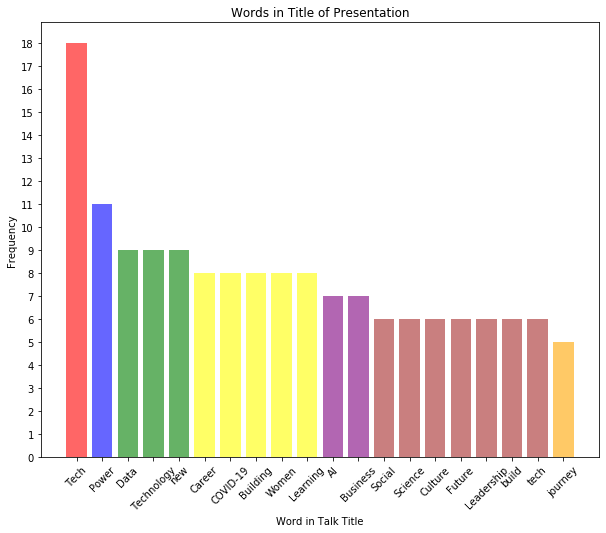

In [67]:
# Plot Content Graph
x = content_df["Words"]
y = content_df["Frequency"]
colors = ["red", "blue", "green", "green", "green", "yellow", "yellow", "yellow", "yellow", "yellow",
         "purple", "purple", "brown", "brown", "brown", "brown", "brown", "brown", "brown", "orange"]

plt.figure(figsize=(10,8))
plt.bar(x, y, alpha=0.6, align="center", color=colors)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(y)+1, 1))

plt.xlabel("Word in Talk Title")
plt.ylabel("Frequency")
plt.title("Words in Title of Presentation")
plt.show()

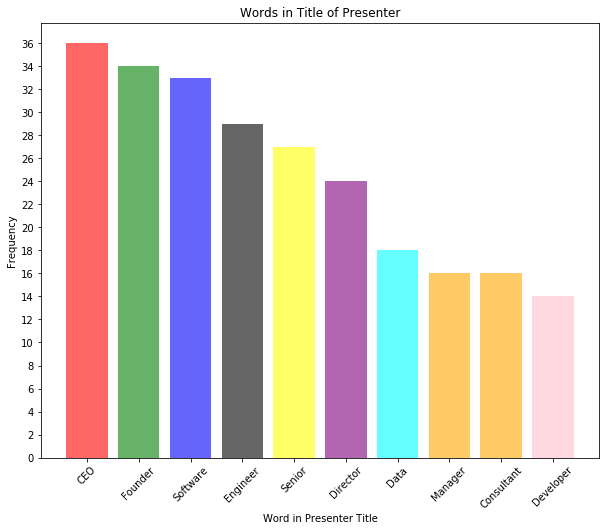

In [70]:
# Plot Presenter Title Graph
# Titles are not mutually exclusive
x = titles_df["Tags"]
y = titles_df["Frequency"]

plt.figure(figsize=(10,8))
plt.bar(x, y, alpha=0.6, align="center", color = ["red", "green", "blue", "black", "yellow", "purple", "aqua", 
                                                 "orange", "orange", "pink"])
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(y)+1, 2))

plt.xlabel("Word in Presenter Title")
plt.ylabel("Frequency")
plt.title("Words in Title of Presenter")
plt.show()